<a href="https://colab.research.google.com/github/loser-boi/imageclassification/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data : Images
# Use Python libraries to scrape the data

In [34]:
!pip install bing-image-downloader

time: 3.15 s (started: 2021-01-07 06:01:20 +00:00)


In [35]:
#create new directory
!mkdir Images 

mkdir: cannot create directory ‘Images’: File exists
time: 134 ms (started: 2021-01-07 06:01:25 +00:00)


In [36]:
#import downloader
from bing_image_downloader import downloader 
downloader.download("people wearing mask face", limit=30,output_dir='Images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from https://images.pexels.com/photos/3957992/pexels-photo-3957992.jpeg?cs=srgb&amp;dl=group-of-people-wearing-face-mask-3957992.jpg&amp;fm=jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://weexpats.com/wp-content/uploads/2019/02/WeExpats-Insurance-Why-Do-Asian-People-Wear-Masks.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://glammpop.com/wp-content/uploads/2020/07/people-wearing-face-mask-for-protection-3957986-1600x1071-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://cnet3.cbsistatic.com/img/jiWZ52VL3fM9V0ZymZAobrJkG-M=/2020/03/06/a13e8ffc-c31f-4f4e-8153-20edc74d365c/gettyimages-1209334802.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.pexels.com/photos/3957986/pexels-photo-3957986.jpeg?cs=srgb&amp;dl=people-wearing-face-mask-for-protection-3957986.jpg&amp;fm=jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://im

In [37]:
downloader.download("people face", limit=30,output_dir='Images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 30 Images on Page 1.


[%] Downloading Image #1 from http://i.huffpost.com/gadgets/slideshows/359340/slide_359340_4004644_free.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://i1.wp.com/thegreentribe.com/wp-content/uploads/2015/08/People-Beautiful-Face-with-Vegetables-in-front-of-Summer-Background-Cropped.jpeg?resize=1050%2C704
[%] File Downloaded !

[%] Downloading Image #3 from http://images.huffingtonpost.com/2014-07-24-ino2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://i.huffpost.com/gen/1929858/images/o-FACE-MERGE-facebook.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://images.fastcompany.net/image/upload/w_1280,f_auto,q_auto,fl_lossy/wp-cms/uploads/2019/02/p-1-90306749-create-fake-people-in-2-seconds-on-this-insane-site.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://images.huffingtonpost.com/2014-07-24-ino.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.thes

In [38]:
#load library which gives execution time for each cell
!pip install ipython-autotime
%load_ext autotime                

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 3.15 s (started: 2021-01-07 06:02:00 +00:00)


In [42]:
# Preprocessing
# 1. Resize
# 2. Flatten

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

#use -flatten()to convert matrix to vector

target = []
images = []
flat_data = []

DATADIR = '/content/Images'
CATEGORIES = ['people wearing mask face', 'people face']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category) #Label encoding the values
  path = os.path.join(DATADIR, category) #Create path for all images

  for img in os.listdir(path):
    img_array = imread(os.path.join(path, img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(150,150,3)) #Normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


time: 1min 23s (started: 2021-01-07 06:03:02 +00:00)


<BarContainer object of 2 artists>

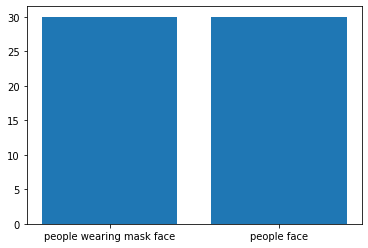

time: 150 ms (started: 2021-01-07 06:06:08 +00:00)


In [43]:
unique,count = np.unique(target, return_counts=True)
plt.bar(CATEGORIES, count)

In [44]:
# Split data into training and testing 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.3,random_state=109) #Split arrays or matrices into random train and test subsets

time: 19.2 ms (started: 2021-01-07 06:06:12 +00:00)


In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# Documentation https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001, 0.0001],'kernel':['rbf']}
]
svc = svm.SVC(probability=True) #Parameter to show all possible outcomes (% match)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 44.5 s (started: 2021-01-07 06:06:16 +00:00)


In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix
y_pred = clf.predict(x_test)
accuracy_score(y_pred,y_test) # % acuracy in result

0.6666666666666666

time: 98.1 ms (started: 2021-01-07 06:07:06 +00:00)


In [47]:
confusion_matrix(y_pred,y_test) # Shows varince in predicted and actual output

array([[5, 0],
       [6, 7]])

time: 4.66 ms (started: 2021-01-07 06:07:10 +00:00)


In [48]:
# Save the model using pickle library for deployment

import pickle
pickle.dump(clf, open('img_model.p','wb'))

time: 63.4 ms (started: 2021-01-07 06:07:13 +00:00)


In [49]:
model = pickle.load(open('img_model.p','rb'))

time: 17.4 ms (started: 2021-01-07 06:07:25 +00:00)


In [50]:
# Testing a brand new image

flat_data = []
url = input('Enter your URL')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f' PREDICTED OUTPUT: {y_out}')

2021-01-07 06:10:07.366 INFO    pyngrok.process.ngrok: t=2021-01-07T06:10:07+0000 lvl=info msg="received stop request" obj=app stopReq="{err:<nil> restart:false}"


KeyboardInterrupt: ignored

time: 2min 37s (started: 2021-01-07 06:07:29 +00:00)


In [51]:
# Deployment (WebApp)

!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

time: 5.99 s (started: 2021-01-07 06:10:13 +00:00)


In [52]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classifier using Machine Learning')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image...", type ="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['Mask detected', 'No mask detected']
    st.write('Result...')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    print(img.shape)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f' PREDICTED OUTPUT: {y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item}:{q[0][index]*100}%')

Overwriting app.py
time: 2.74 ms (started: 2021-01-07 06:10:23 +00:00)


In [54]:
import sys
import streamlit as st
from streamlit import cli as stcli

if __name__ == '__main__':
    sys.argv = ["streamlit", "run", "app.py"]
    sys.exit(stcli.main())

ContextualVersionConflict: ignored

time: 113 ms (started: 2021-01-07 06:11:12 +00:00)
